In [1]:
import os
import glob
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

startDate = '20201015'
endDate = '20201125'

print(startDate)

readPath = '/mnt/equityTradeLogs'
dataPathLs = np.array(glob.glob(os.path.join(readPath, 'speedCompare***.csv')))
dateLs = np.array([os.path.basename(i).split('_')[1].split('.')[0] for i in dataPathLs])
dataPathLs = dataPathLs[(dateLs >= startDate) & (dateLs <= endDate)]
rawOrderLog = []
print(dataPathLs)
for thisDate, thisPath in zip(dateLs, dataPathLs):
    data = pd.read_csv(thisPath)
    data = data.rename(columns={'mdClockAtArrival': 'caamd'})
    rawOrderLog += [data]
    print(data['date'].unique())
rawOrderLog = pd.concat(rawOrderLog, sort=False)

for col in ['clockAtArrival', 'caamd', 'secid', 'updateType', 'vai', 'absFilledThisUpdate', 'orderDirection', 'absOrderSize',
            'absOrderSizeCumFilled', 'date', 'accCode', 'mse']:
    rawOrderLog[col] = rawOrderLog[col].fillna(0).astype('int64')   
rawOrderLog = rawOrderLog.sort_values(by=['date', 'secid', 'vai', 'accCode', 'clockAtArrival']).reset_index(drop=True)

rawOrderLog = rawOrderLog[rawOrderLog["secid"] >= 1000000]

display('There are accounts with duplicated ticks:')
display(rawOrderLog[rawOrderLog.duplicated(['date', 'secid', 'vai', 'accCode', 'clockAtArrival', 'updateType', \
                                    'orderDirection', 'absOrderSize'], keep=False)]\
.groupby(['date', 'colo', 'accCode'])['ars'].size())
rawOrderLog = rawOrderLog.drop_duplicates(['date', 'secid', 'vai', 'accCode', 'clockAtArrival', 'updateType', \
                                    'orderDirection', 'absOrderSize'], keep='first')

display('There are ticks with orderDirection 0')
display(rawOrderLog[rawOrderLog['orderDirection'] == 0][['date', 'colo', 'accCode', \
            'secid', 'vai', 'updateType', 'sdd', 'orderDirection', 'absOrderSize', 'internalId', 'orderId']])

# assert(rawOrderLog[rawOrderLog['updateType'] == 0][rawOrderLog[rawOrderLog['updateType'] == 0]\
#                                                    .duplicated(['date', 'colo', 'accCode', 'secid', 'orderDirection',
#                                                                 'vai', 'absOrderSize', 'internalId'], keep=False)].shape[0] == 0)
# if rawOrderLog[rawOrderLog['updateType'] == 0][rawOrderLog[rawOrderLog['updateType'] == 0]\
#                                                    .duplicated(['date', 'colo', 'accCode', 'secid', 'orderDirection',
#                                                                 'absOrderSize', 'internalId'], keep=False)].shape[0] != 0:
#     assert(rawOrderLog[rawOrderLog['updateType'] == 0][rawOrderLog[rawOrderLog['updateType'] == 0]\
#                                                    .duplicated(['date', 'colo', 'accCode', 'secid', 'orderDirection',
#                                                                 'absOrderSize', 'internalId'], keep=False)]['accCode'].unique() == [8856])
#     print('8856 has wrong internalId')
#     assert(sum(rawOrderLog[(rawOrderLog['updateType'] != 0) & (rawOrderLog['accCode'] != 8856)].groupby(['date', 'colo', 'accCode', 'secid', 
#             'orderDirection', 'absOrderSize', 'internalId'])['orderId'].nunique() != 1) == 0)
#     if rawOrderLog[(rawOrderLog['accCode'] != 8856) & (rawOrderLog['vai'] == -1)].shape[0] != 0:
#         print(rawOrderLog[(rawOrderLog['accCode'] != 8856) & (rawOrderLog['vai'] == -1)][['date', 'colo', 'accCode', \
#             'secid', 'vai', 'updateType', 'sdd', 'orderDirection', 'absOrderSize', 'internalId', 'orderId']])   
# else:
#     print('we can use internalId in 8856')
#     assert(sum(rawOrderLog[(rawOrderLog['updateType'] != 0) & (rawOrderLog['accCode'] != 8856)].groupby(['date', 'colo', 'accCode', 'secid', 
#             'orderDirection', 'absOrderSize', 'internalId'])['orderId'].nunique() != 1) == 0)   

assert(rawOrderLog[rawOrderLog['updateType'] == 0][rawOrderLog[rawOrderLog['updateType'] == 0]\
                                                   .duplicated(['date', 'colo', 'accCode', 'secid', 'orderDirection',
                                                                'vai', 'absOrderSize', 'internalId'], keep=False)].shape[0] == 0)
try:
    assert(rawOrderLog[(rawOrderLog['updateType'] == 0) & (rawOrderLog['accCode'] != 8856)][rawOrderLog[(rawOrderLog['updateType'] == 0) & (rawOrderLog['accCode'] != 8856)]\
                                                       .duplicated(['date', 'colo', 'accCode', 'secid', 'orderDirection',
                                                                    'absOrderSize', 'internalId'], keep=False)].shape[0] == 0)
except:
    print('There are orders with all things same except sdd')
    print(rawOrderLog[(rawOrderLog['updateType'] == 0) & (rawOrderLog['accCode'] != 8856)][rawOrderLog[(rawOrderLog['updateType'] == 0) & (rawOrderLog['accCode'] != 8856)]\
                                                       .duplicated(['date', 'colo', 'accCode', 'secid', 'orderDirection',
                                                                    'absOrderSize', 'internalId'], keep=False)])
    assert(rawOrderLog[(rawOrderLog['updateType'] == 0) & (rawOrderLog['accCode'] != 8856)][rawOrderLog[(rawOrderLog['updateType'] == 0) & (rawOrderLog['accCode'] != 8856)]\
                                                       .duplicated(['date', 'colo', 'accCode', 'secid', 'orderDirection',
                                                                    'absOrderSize', 'internalId', 'sdd'], keep=False)].shape[0] == 0)
try:
    assert(sum(rawOrderLog[(rawOrderLog['updateType'] != 0) & (rawOrderLog['accCode'] != 8856)].groupby(['date', 'colo', 'accCode', 'secid', 
                'orderDirection', 'absOrderSize', 'internalId'])['orderId'].nunique() != 1) == 0) 
except:
    print('There are orders with same internalId other than accCode 8856 case')
    print(rawOrderLog[(rawOrderLog['updateType'] != 0) & (rawOrderLog['accCode'] != 8856)].groupby(['date', 'colo', 'accCode', 'secid', 
                'orderDirection', 'absOrderSize', 'internalId'])['orderId'].nunique()[rawOrderLog[(rawOrderLog['updateType'] != 0) & (rawOrderLog['accCode'] != 8856)].groupby(['date', 'colo', 'accCode', 'secid', 
                'orderDirection', 'absOrderSize', 'internalId'])['orderId'].nunique() > 1])

r2 = rawOrderLog[(rawOrderLog['accCode'] != 8856) & (rawOrderLog['orderDirection'] != 0)]
r1 = rawOrderLog[(rawOrderLog['accCode'] == 8856) & (rawOrderLog['orderDirection'] != 0)]
r1['test'] = r1.groupby(['date', 'colo', 'accCode', 'secid', 
            'orderDirection', 'absOrderSize']).grouper.group_info[0]
r1 = r1.sort_values(by=['test', 'clockAtArrival'])
r1.loc[r1['updateType'] != 0, 'vai'] = np.nan
r1['vai'] = r1.groupby('test')['vai'].ffill()
r2['test'] = r2.groupby(['date', 'colo', 'accCode', 'secid', 
            'orderDirection', 'absOrderSize', 'internalId']).grouper.group_info[0]
r2 = r2.sort_values(by=['test', 'clockAtArrival'])
r2.loc[r2['updateType'] != 0, 'vai'] = np.nan
r2['vai'] = r2.groupby('test')['vai'].ffill()
assert(sum(r1[r1['updateType'] != 0].groupby(['test', 'vai'])['orderId'].nunique() != 1) == 0)
try:
    assert(sum(r2[r2['updateType'] != 0].groupby(['test', 'vai'])['orderId'].nunique() != 1) == 0)
except:
    a = r2[r2['updateType'] != 0].groupby(['test', 'vai'])['orderId'].nunique()[r2[r2['updateType'] != 0].groupby(['test', 'vai'])['orderId'].nunique() != 1].reset_index()
    print(pd.merge(r2, a[['test', 'vai']], on=['test', 'vai'], how='inner')[['secid', 'accCode', 'colo', 'vai', 'updateType', 'sdd', 'internalId', 'orderId', 'absOrderSize', 'absFilledThisUpdate', 'absOrderSizeCumFilled', 'orderPrice', 'tradePrice']])
    
orderLog = pd.concat([r1, r2])
del r1
del r2    

orderLog['clock'] = orderLog['clockAtArrival'].apply(lambda x: datetime.datetime.fromtimestamp(x/1e6))
orderLog['broker'] = orderLog['accCode'] // 100
orderLog["broker"] = np.where(orderLog["accCode"].astype(str).apply(lambda x: len(x) == 6), orderLog['accCode'] // 10000, orderLog["broker"])
orderLog['colo_broker'] = orderLog['colo'].str[:2] + '_' + orderLog['broker'].astype('str')
orderLog['order'] = orderLog.groupby(['date', 'accCode', 'secid', 'vai']).grouper.group_info[0]
orderLog['group'] = orderLog.groupby(['date', 'secid', 'vai']).grouper.group_info[0]
orderLog['startClock'] = orderLog.groupby(['order'])['clockAtArrival'].transform('first')
orderLog['duration'] = orderLog['clockAtArrival'] - orderLog['startClock']
orderLog['orderPrice'] = orderLog['orderPrice'].apply(lambda x: round(x, 2))
orderLog['tradePrice'] = orderLog['tradePrice'].apply(lambda x: round(x, 2))
orderLog['orderDirection1'] = np.where(orderLog["orderDirection"] == -2, -1, np.where(
    orderLog["orderDirection"] == 2, 1, orderLog["orderDirection"]))
orderLog["ars"] = orderLog.groupby(['order'])['ars'].transform('first')
# rawOrderLog = rawOrderLog[rawOrderLog['ars'] % 10 == 1]


### Assertion 1:  make sure same direction in same date, secid, vai
print('=======================================================================================')
print('1. same date, secid, vai: same direction')
orderLog['directNum'] = orderLog.groupby(['date', 'secid', 'vai'])['orderDirection1'].transform('nunique')
if len(orderLog[orderLog['directNum'] != 1]) > 0:
    print('opposite direction for same date, same secid, same vai')
    display(orderLog[(orderLog['directNum'] != 1) & (orderLog['updateType'] == 0)].groupby(['accCode'])['orderDirection'].size())
    orderLog = orderLog[orderLog['directNum'] == 1]

assert((orderLog.groupby(['date', 'secid', 'vai'])['orderDirection1'].nunique() == 1).all() == True)

## Assertion 2:  make sure each account, secid, vai only has one insertion
print('=======================================================================================')
print('2. same date, secid, vai, accCode: one insertion')
a = orderLog[orderLog['updateType'] == 0].groupby(['date', 'colo', 'accCode', 'secid', 'vai', 'order'])['clockAtArrival'].count()
if len(a[a > 1]) > 0:
    print('more than one insertion at same time')
    a = a[a>1].reset_index()
    display(a)
    display(a.groupby(['accCode'])['date'].size())
    orderLog = orderLog[~(orderLog['order'].isin(a['order'].unique()))]

orderLog['isMsg'] = np.where(orderLog['updateType'] == 0, 
                             np.where(orderLog['mse'] == 100, 1, 0), np.nan)
orderLog['isMsg'] = orderLog.groupby(['order'])['isMsg'].ffill()

placeSZE = orderLog[(orderLog['secid'] >= 2000000) & (orderLog['updateType'] == 0)]
print('%.2f%% SZE orders triggered by msg data'%(placeSZE[placeSZE['isMsg'] == 1].shape[0]/placeSZE.shape[0]*100))


### Assertion 3:  check IPO stocks selling status
print('=======================================================================================')
print('3. IPO stocks selling (ars = 301, 302)')
if orderLog[orderLog['ars'].isin([301, 302])].shape[0] != 0:
    kk = orderLog[orderLog['ars'].isin([301, 302])]
    print(kk)
    try:
        assert(kk[kk['orderDirection1'] == 1].shape[0] == 0)
        print('we only sell, never buy')
    except:
        print('There are IPO buy side orders!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
        print(kk[kk['orderDirection1'] == 1])
    kk1 = kk[kk['updateType'] == 0]
    kk1 = kk1.sort_values(by=['accCode', 'secid','clockAtArrival'])
    kk1['diff'] = kk1.groupby(['accCode', 'secid'])['clockAtArrival'].apply(lambda x: x-x.shift(1))
    kk1['diff'] = kk1['diff'].fillna(0)
    try:
        assert(kk1[kk1['diff'] < 10e6].shape[0] == 0)
        print('for each stock in the same account, there is no insertion within 10 seconds of the previous insertion')
    except:
        print('There are insertion within 10 seconds for orders under same account same stock!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
        print(kk1[kk1['diff'] < 10e6])
    kk2 = kk[(kk['updateType'] == 1)]
    try:
        assert(kk2[kk2['duration'] < 3e6].shape[0] == 0)
        print('for each stock in the same account, the cancellation of an order happens more than 3 seconds after the insertion')
    except:
        print('There are cancellation within 3 seconds for orders under same account same stock!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
        print(kk2[kk2['duration'] < 3e6])


### Assertion 4: check updateType == 7 orders, make sure updateType == 7 orders < 20 per account, < 100 in total
print('=======================================================================================')
print('4. updateType 7 orders')
if orderLog[orderLog['updateType'] == 7].shape[0] != 0:
    assert(orderLog[orderLog['updateType'] == 7].groupby(['date', 'accCode'])['order'].nunique().max() < 20)
    assert(orderLog[orderLog['updateType'] == 7].groupby(['date', 'accCode'])['order'].nunique().sum() < 100)

### Assertion 5: check updateType == 6 orders, make sure updateType == 6 orders < 5% per account
print('=======================================================================================')
print('5. updateType 6 orders')
k1 = orderLog[orderLog['updateType'] == 6].groupby(['date', 'accCode'])['order'].nunique().reset_index()
k2 = orderLog.groupby(['date', 'accCode'])['order'].nunique().reset_index()
k = pd.merge(k1, k2, on=['date', 'accCode'], how='left')
k['prob'] = k['order_x']/k['order_y']
try:
    assert(sum(k['prob'] >= 0.05) == 0)
except:
    print('There are accounts with more than 5% updateType 6 orders!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
    print(k[k['prob'] >= 0.05])

### Assertion 6: check CYB orders, make sure all CYB stocks have absOrderSize < 30w
print('=======================================================================================')
print('6. CYB stocks order size < 30w')
try:
    cyb = orderLog[(orderLog['secid'] >= 2300000) & (orderLog['updateType'] == 0)].groupby('date')['absOrderSize'].max().reset_index()
    assert(cyb[cyb['absOrderSize'] > 300000].shape[0] == 0)
except:
    print('CYB stocks total absOrderSize >= 30w!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
    
     
### Assertion 7:  make sure there is no unexpected updateType 
print('=======================================================================================')
print('7. unexpected updateType')
def getTuple(x):
    return tuple(i for i in x)

checkLog = orderLog[~((orderLog['updateType'] == 4) & (orderLog.groupby(['order'])['updateType'].shift(-1) == 4))]
checkLog = checkLog.groupby(['order'])['updateType'].apply(lambda x: getTuple(x)).reset_index()
checkLog['status'] = np.where(checkLog['updateType'].isin([(0, 2, 4), (0, 2, 1, 4), (0, 2, 1, 2, 4), (0, 2, 4, 1, 4), (0, 4), (0, 1, 4), (0, 4, 1, 4), (0, 2, 2, 4), (0, 4, 2, 4), (0, 2, 2, 1, 4), (0, 2, 2, 4, 1, 4)]),0,
                     np.where(checkLog['updateType'].isin([(0, 2, 4, 1, 3), (0, 2, 4, 1, 4, 3), (0, 2, 1, 4, 3), (0, 4, 1, 3), (0, 1, 4, 3),
                                                               (0, 2, 2, 4, 1, 3), (0, 2, 2, 4, 1, 4, 3), (0, 2, 2, 1, 4, 3), (0, 4, 2, 4, 1, 3),
                                                               (0, 4, 2, 1, 3), (0, 4, 1, 4, 3), (0, 4, 1)]), 1,
                     np.where(checkLog['updateType'].isin([(0, 2, 1, 3), (0, 2, 2, 1, 3), (0, 2, 3), (0, 3), (0, 1, 3), (0, ), (0, 2), (0, 2, 1), (0, 2, 2)]), 2, 3)))

orderLog = pd.merge(orderLog, checkLog[['order', 'status']], how='left', on=['order'], validate='many_to_one')
orderLog = orderLog[orderLog['status'].isin([0, 1, 2])].reset_index(drop=True)

### Assertion 8:  make sure status==0 got all traded
print('=======================================================================================')
print('8. status == 0: all traded')
a = orderLog[orderLog['status'] == 0]
a = a.groupby(['order'])[['absOrderSizeCumFilled', 'absOrderSize']].max().reset_index()
a.columns = ['order', 'filled', 'total']
print('in total trade, any fill != total cases')
display(a[a['filled'] != a['total']])
if a[a['filled'] != a['total']].shape[0] > 0:
    removeOrderLs = a[a['filled'] != a['total']]['order'].unique()
    orderLog = orderLog[~(orderLog['order'].isin(removeOrderLs))]
    
### Assertion 9:  make sure status==1 got partial traded
print('=======================================================================================')
print('9. status == 1: partial traded')
a = orderLog[orderLog['status'] == 1]
a = a.groupby(['order'])[['absOrderSizeCumFilled', 'absOrderSize']].max().reset_index()
a.columns = ['order', 'filled', 'total']
print('in partial trade, any fill >= total or fill is 0 cases for updateType 4')
display(a[(a['filled'] >= a['total']) | (a['filled'] == 0)])
if a[(a['filled'] >= a['total']) | (a['filled'] == 0)].shape[0] > 0:
    removeOrderLs = a[(a['filled'] >= a['total']) | (a['filled'] == 0)]['order'].unique()
    orderLog = orderLog[~(orderLog['order'].isin(removeOrderLs))]
    
### Assertion 10: make sure no cancellation within 1 sec
print('=======================================================================================')
print('10. no cancellation within 1 sec')
a = orderLog[(orderLog['updateType'] == 1) & (orderLog['duration'] < 1e6)]
print('any cancellation within 1 sec')
display(a)
if a.shape[0] > 0:
    removeOrderLs = a['order'].unique()
    orderLog = orderLog[~(orderLog['order'].isin(removeOrderLs))]


### Assertion 11: make sure no order has shares > 80w or notional > 800w
print('=======================================================================================')
print('11. Orders with size > 80w or notional > 800w')
orderLog['orderNtl'] = orderLog['absOrderSize'] * orderLog['orderPrice']
if orderLog[orderLog['absOrderSize'] > 800000].shape[0] > 0:
    print('some order quantity are > 80w')
    print(orderLog[orderLog['absOrderSize'] > 800000].groupby(['colo', 'accCode'])['order'].nunique())
    display(orderLog[orderLog['absOrderSize'] > 800000][['date', 'accCode', 'secid', 'vai', 'absOrderSize', 'orderPrice',
                                                         'orderNtl', 'orderDirection', 'clock', 'order']])
            
if orderLog[orderLog['orderNtl'] > 8000000].shape[0] > 0:
    print('some order ntl are > 800w')
    print(orderLog[orderLog['orderNtl'] > 8000000].groupby(['colo', 'accCode'])['order'].nunique())
    display(orderLog[orderLog['orderNtl'] > 8000000][['date', 'accCode', 'secid', 'vai', 'absOrderSize', 'orderPrice',
                                                      'orderNtl', 'orderDirection', 'clock', 'order', "updateType", 
                                                      "tradePrice", "absOrderSizeCumFilled", "absFilledThisUpdate"]])

removeOrderLs = list(set(orderLog[orderLog['absOrderSize'] > 800000]['order'].unique()) | set(orderLog[orderLog['orderNtl'] > 8000000]['order'].unique()))
orderLog = orderLog[~(orderLog['order'].isin(removeOrderLs))]


orderLog = orderLog.sort_values(by=['date', 'secid', 'vai', 'accCode', 'clockAtArrival']).reset_index(drop=True)

orderLog["mrsb90"] = orderLog.groupby(['order'])['mrsb90'].transform('first')
orderLog["mrss90"] = orderLog.groupby(['order'])['mrss90'].transform('first')
orderLog["aaa"] = orderLog.groupby(['order'])['aaa'].transform('first')

orderLog['m1'] = orderLog['mrstaat'].apply(lambda x: x - (x // 10000) * 10000)
orderLog['m2'] = orderLog['mrstauc'].apply(lambda x: x - (x // 10000) * 10000)
if orderLog[orderLog['mrsb90'] == '-'].shape[0] != 0:
    display(orderLog[orderLog['mrsb90'] == '-'])
orderLog = orderLog[orderLog['mrsb90'] != '-']
orderLog['mrsb90'] = orderLog['mrsb90'].astype(float)
if orderLog[orderLog['aaa'] == '-'].shape[0] != 0:
    display(orderLog[orderLog['aaa'] == '-'])
orderLog = orderLog[orderLog['aaa'] != '-']
orderLog['aaa'] = orderLog['aaa'].astype(float)
orderLog.loc[(orderLog['orderDirection'] >= 1) &\
         (orderLog['mrstaat'].isin([11000, 13000])) & (abs(orderLog['aaa'] - orderLog['mrsb90']) < 1e-12), 'mrstauc'] = \
orderLog.loc[(orderLog['orderDirection'] >= 1) &\
         (orderLog['mrstaat'].isin([11000, 13000])) & (abs(orderLog['aaa'] - orderLog['mrsb90']) < 1e-12), 'm2']

orderLog.loc[(orderLog['orderDirection'] >= 1) &\
         (orderLog['mrstaat'].isin([11000, 13000])) & (abs(orderLog['aaa'] - orderLog['mrsb90']) < 1e-12), 'mrstaat'] = \
orderLog.loc[(orderLog['orderDirection'] >= 1) &\
         (orderLog['mrstaat'].isin([11000, 13000])) & (abs(orderLog['aaa'] - orderLog['mrsb90']) < 1e-12), 'm1']

orderLog.loc[(orderLog['orderDirection'] < 1) &\
         (orderLog['mrstaat'].isin([11000, 13000])) & (abs(orderLog['aaa'] - orderLog['mrss90']) < 1e-12), 'mrstauc'] = \
orderLog.loc[(orderLog['orderDirection'] < 1) &\
         (orderLog['mrstaat'].isin([11000, 13000])) & (abs(orderLog['aaa'] - orderLog['mrss90']) < 1e-12), 'm2']

orderLog.loc[(orderLog['orderDirection'] < 1) &\
         (orderLog['mrstaat'].isin([11000, 13000])) & (abs(orderLog['aaa'] - orderLog['mrss90']) < 1e-12), 'mrstaat'] = \
orderLog.loc[(orderLog['orderDirection'] < 1) &\
         (orderLog['mrstaat'].isin([11000, 13000])) & (abs(orderLog['aaa'] - orderLog['mrss90']) < 1e-12), 'm1']    

orderLog['exchange'] = np.where(orderLog['secid'] >= 2000000, 'SZE', 'SSE')
orderLog['orderNtl'] = orderLog['orderPrice'] * orderLog['absOrderSize']
orderLog['tradeNtl'] = np.where(orderLog['updateType'] == 4, orderLog['tradePrice']*orderLog['absFilledThisUpdate'], 0)
orderLog["mrstaat"] = orderLog.groupby(['order'])['mrstaat'].transform('first')
orderLog["ars"] = orderLog.groupby(['order'])['ars'].transform('first')
orderLog["mrstauc"] = orderLog.groupby(['order'])['mrstauc'].transform('first')
orderLog = orderLog[~orderLog['ars'].isnull()]
orderLog['sta'] = np.where(orderLog['mrstaat'] == 1000, '1. staone', np.where(
orderLog['mrstaat'] == 3000, '2. statwo', np.where(
orderLog['mrstaat'].isin([11000, 13000]), '3. sta300', 'else')))
display(orderLog[orderLog['sta'] == 'else'][['date', 'secid', 'colo', 'accCode', 'updateType', 'vai', 'absOrderSize', 'orderDirection', 'mrstaat', 'mrstauc', 'sdd', 'ApplSeqNum', 'sta']])
orderLog = orderLog[orderLog['mrstaat'].isin([11000, 13000, 1000, 3000])]
display(orderLog[orderLog['updateType'] == 0].groupby(['mrstaat', 'mrstauc'])['date'].size())

20201015
['/mnt/equityTradeLogs/speedCompare_20201124.csv'
 '/mnt/equityTradeLogs/speedCompare_20201015.csv'
 '/mnt/equityTradeLogs/speedCompare_20201016.csv'
 '/mnt/equityTradeLogs/speedCompare_20201019.csv'
 '/mnt/equityTradeLogs/speedCompare_20201020.csv'
 '/mnt/equityTradeLogs/speedCompare_20201021.csv'
 '/mnt/equityTradeLogs/speedCompare_20201022.csv'
 '/mnt/equityTradeLogs/speedCompare_20201023.csv'
 '/mnt/equityTradeLogs/speedCompare_20201026.csv'
 '/mnt/equityTradeLogs/speedCompare_20201027.csv'
 '/mnt/equityTradeLogs/speedCompare_20201028.csv'
 '/mnt/equityTradeLogs/speedCompare_20201029.csv'
 '/mnt/equityTradeLogs/speedCompare_20201030.csv'
 '/mnt/equityTradeLogs/speedCompare_20201102.csv'
 '/mnt/equityTradeLogs/speedCompare_20201103.csv'
 '/mnt/equityTradeLogs/speedCompare_20201104.csv'
 '/mnt/equityTradeLogs/speedCompare_20201105.csv'
 '/mnt/equityTradeLogs/speedCompare_20201106.csv'
 '/mnt/equityTradeLogs/speedCompare_20201109.csv'
 '/mnt/equityTradeLogs/speedCompare_20201

/home/work516/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (54,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[20201124]


/home/work516/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (50,58) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[20201015]
[20201016]
[20201019]


/home/work516/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (34,50,58) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[20201020]
[20201021]
[20201022]


/home/work516/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[20201023]
[20201026]


/home/work516/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (51,59) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[20201027]


/home/work516/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (45,51,59) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[20201028]


/home/work516/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (35,51,59) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[20201029]
[20201030]
[20201102]
[20201103]
[20201104]


/home/work516/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (52,60) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[20201105]
[20201106]


/home/work516/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,52,60) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[20201109]


/home/work516/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (35,52,60) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[20201110]
[20201111]
[20201112]
[20201113]
[20201116]


/home/work516/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (19,52,60) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[20201117]
[20201118]
[20201119]


/home/work516/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,54,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[20201120]
[20201123]
[20201125]


'There are accounts with duplicated ticks:'

date      colo      accCode
20201106  zs_88_04  892402     11272
          zs_96_02  9655        1450
          zt_88_02  897102     20282
20201112  zs_96_08  974101     27542
          zt_88_06  8971       25984
Name: ars, dtype: int64

'There are ticks with orderDirection 0'

,date,colo,accCode,secid,vai,updateType,sdd,orderDirection,absOrderSize,internalId,orderId
347326,20201015,zs_52_09,5291,2000690,-1,7,34779.0,0,0,-1.0,-1.000000e+00
355505,20201015,zs_52_06,5269,2000762,-1,1,47723.0,0,0,-1.0,1.312819e+06
380405,20201015,zs_52_09,5291,2000998,-1,1,39199.0,0,0,-1.0,1.040596e+06
405206,20201015,zs_64_01,6480,2002098,-1,1,47430.0,0,0,-1.0,3.641870e+05
414924,20201015,zs_52_08,5281,2002153,-1,1,40041.0,0,0,-1.0,1.120545e+06
...,...,...,...,...,...,...,...,...,...,...,...
28304713,20201125,zs_66_01,6634,2300642,-1,7,36827.0,0,0,-1.0,-1.000000e+00
28317059,20201125,zs_52_06,5287,2300674,-1,1,47824.0,0,0,-1.0,1.103285e+06
28325666,20201125,zs_54_01,5474,2300693,-1,1,36051.0,0,0,-1.0,8.689017e+08
28340274,20201125,zs_96_08,9685,2300724,-1,7,52554.0,0,0,-1.0,7.221449e+17


There are orders with all things same except sdd
          ApplSeqNum       aaa  absFilledThisUpdate  absOrderSize  \
26757824         0.0  0.001793                    0           100   
26757846   2320094.0   0.00146                    0           100   

          absOrderSizeCumFilled  accCode  ars             caamd  \
26757824                      0   966701  1.0  1606182281039235   
26757846                      0   966701  1.0  1606187432401164   

          cancellationPending         cfe  ...  threadId  totalActions  \
26757824                  0.0  8782423.05  ...   24760.0          45.0   
26757846                  0.0  3252543.10  ...   27475.0         429.0   

          totalCanceled  tradeId  tradePrice  underlyingIndex  updateType  \
26757824            2.0      NaN        -1.0              300           0   
26757846           34.0      NaN        -1.0              300           0   

              vai                            zipFile      colo  
26757824   636126  lo

/home/work516/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/work516/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


     secid  accCode      colo        vai  updateType          sdd  internalId  \
0  2002532     9741  zs_96_08  1479109.0           0  102017490.0      1773.0   
1  2002532     9741  zs_96_08  1479109.0           2         -1.0      1773.0   
2  2002532     9741  zs_96_08  1479109.0           4         -1.0      1773.0   
3  2002532     9741  zs_96_08  1479109.0           4         -1.0      1773.0   
4  2002532     9741  zs_96_08  1479109.0           1      37312.0      1773.0   
5  2002532     9741  zs_96_08  1479109.0           3         -1.0      1773.0   

        orderId  absOrderSize  absFilledThisUpdate  absOrderSizeCumFilled  \
0 -1.000000e+00           900                    0                      0   
1  7.211642e+17           900                    0                      0   
2  7.211642e+17           900                  100                    100   
3  7.211642e+17           900                  100                    200   
4  7.211642e+17           900                  

accCode
5222       4
5226       2
5229       5
5230       3
5273       1
          ..
897102     3
965801     3
966301    14
966501     8
968501     2
Name: orderDirection, Length: 65, dtype: int64

2. same date, secid, vai, accCode: one insertion
more than one insertion at same time


,date,colo,accCode,secid,vai,order,clockAtArrival
0,20201015,zs_54_01,5456,2002947,184300.0,67411,2
1,20201015,zs_54_01,5456,2300552,38000.0,67835,2
2,20201015,zs_54_01,5456,2300788,300.0,67970,3
3,20201015,zs_54_01,5456,2300788,1780.0,67972,2
4,20201015,zs_54_01,5456,2300788,1880.0,67973,2
...,...,...,...,...,...,...,...
1002,20201125,zs_96_08,6282,1603317,1997091.0,6817619,2
1003,20201125,zs_96_08,6282,1603515,324319.0,6817660,2
1004,20201125,zs_96_08,6282,1603515,1312687.0,6817675,2
1005,20201125,zt_88_06,8854,2300724,2638915.0,6846290,2


accCode
5222        8
5225       11
5226        6
5269        6
5273       10
5275      106
5276        6
5281        3
5284        5
5287        5
5289        4
5290        4
5291        5
5328        3
5456      143
5470        6
5474        4
6237       88
6282       90
6480        2
6623        3
6627        3
6631        3
6634        7
6683        4
8833        1
8854       45
8865        7
8886        8
9441       27
9451        7
9454        5
9461       17
9471        6
9551        3
9561        1
9685        3
9741        6
9758      265
522201      3
522401      3
522501      1
522601      1
526901      4
527301      3
527501      3
527601      3
527701      7
528101      4
528401      3
528701      4
528901      4
529001      3
529101      3
892402      1
966301      3
966501      3
966701      7
968501      5
974101      3
Name: date, dtype: int64

99.66% SZE orders triggered by msg data
3. IPO stocks selling (ars = 301, 302)
        ApplSeqNum aaa  absFilledThisUpdate  absOrderSize  \
849801         0.0   0                    0         10999   
849802         0.0  -1                    0         10999   
849803         0.0  -1                 5400         10999   
849804         0.0  -1                  300         10999   
849805         0.0  -1                  300         10999   
...            ...  ..                  ...           ...   
302771         0.0   0                    0          1167   
302772         0.0  -1                    0          1167   
302773         0.0  -1                  292          1167   
302774         0.0  -1                  875          1167   
849860         0.0   0                    0          8555   

        absOrderSizeCumFilled  accCode    ars  caamd  cancellationPending  \
849801                      0     5470  302.0      0                  0.0   
849802                      0     

5. updateType 6 orders
There are accounts with more than 5% updateType 6 orders!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
         date  accCode  order_x  order_y      prob
30   20201027     6282      234     1610  0.145342
109  20201113     6282      154     1888  0.081568
6. CYB stocks order size < 30w
7. unexpected updateType
8. status == 0: all traded
in total trade, any fill != total cases


,order,filled,total
21663,30325,4400,16900
27820,39094,900,1000
31840,44226,3248,7000
45061,61715,3700,14200
45102,61789,300,2100
...,...,...,...
4933376,6945489,300,1300
4938257,6952730,700,1500
4940275,6955457,400,2800
4941149,6956640,795,21700


9. status == 1: partial traded
in partial trade, any fill >= total or fill is 0 cases for updateType 4


,order,filled,total


10. no cancellation within 1 sec
any cancellation within 1 sec


,ApplSeqNum,aaa,absFilledThisUpdate,absOrderSize,absOrderSizeCumFilled,accCode,ars,caamd,cancellationPending,cfe,...,broker,colo_broker,order,group,startClock,duration,orderDirection1,directNum,isMsg,status


11. Orders with size > 80w or notional > 800w
some order ntl are > 800w
colo      accCode
zt_52_05  527501     1
zt_88_06  8971       2
Name: order, dtype: int64


,date,accCode,secid,vai,absOrderSize,orderPrice,orderNtl,orderDirection,clock,order,updateType,tradePrice,absOrderSizeCumFilled,absFilledThisUpdate
19181477,20201111,8971,1600031,68524384.0,277800,28.8,8000640.0,1,2020-11-11 13:04:54.879842,4645936,0,-1.0,0,0
19181478,20201111,8971,1600031,68524384.0,277800,28.8,8000640.0,1,2020-11-11 13:04:55.034330,4645936,2,-1.0,0,0
19181479,20201111,8971,1600031,68524384.0,277800,28.8,8000640.0,1,2020-11-11 13:04:55.275614,4645936,4,28.8,300,300
19181480,20201111,8971,1600031,68524384.0,277800,28.8,8000640.0,1,2020-11-11 13:04:55.275760,4645936,4,28.8,406,106
19181481,20201111,8971,1600031,68524384.0,277800,28.8,8000640.0,1,2020-11-11 13:04:55.275903,4645936,4,28.8,2406,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22067899,20201116,8971,1600585,19334231.0,141600,56.5,8000400.0,1,2020-11-16 11:02:10.974065,5362654,4,56.5,121000,100
22067900,20201116,8971,1600585,19334231.0,141600,56.5,8000400.0,1,2020-11-16 11:02:10.974422,5362654,4,56.5,121200,200
22067901,20201116,8971,1600585,19334231.0,141600,56.5,8000400.0,1,2020-11-16 11:02:10.974591,5362654,4,56.5,121300,100
22067902,20201116,8971,1600585,19334231.0,141600,56.5,8000400.0,1,2020-11-16 11:02:11.658279,5362654,1,-1.0,121300,0


,date,secid,colo,accCode,updateType,vai,absOrderSize,orderDirection,mrstaat,mrstauc,sdd,ApplSeqNum,sta
54228,20201015,1600458,zt_52_04,526901,0,3325219.0,1400,-1,NaN,NaN,145644000.0,NaN,else
302527,20201015,1688330,zt_88_02,8854,0,11803323.0,500,-1,0.0,0.0,134103000.0,0.0,else
302528,20201015,1688330,zt_88_02,8854,2,11803323.0,500,-1,0.0,0.0,-1.0,0.0,else
302529,20201015,1688330,zt_88_02,8854,4,11803323.0,500,-1,0.0,0.0,-1.0,0.0,else
302530,20201015,1688330,zs_94_05,9451,0,11803323.0,500,-1,0.0,0.0,134103000.0,0.0,else
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27432939,20201125,1600636,zt_96_09,968501,2,3256075.0,2300,-1,2000.0,1000.0,-1.0,0.0,else
27432940,20201125,1600636,zt_96_09,968501,4,3256075.0,2300,-1,2000.0,1000.0,-1.0,0.0,else
27432941,20201125,1600636,zt_96_09,968501,4,3256075.0,2300,-1,2000.0,1000.0,-1.0,0.0,else
27538073,20201125,1601916,zs_96_06,9765,0,34187100.0,500,-1,NaN,NaN,145251000.0,NaN,else


mrstaat  mrstauc
1000.0   0.0        1089695
3000.0   1000.0     5064129
         2000.0      342438
         3000.0      144538
11000.0  10000.0      14031
         20000.0        842
         30000.0        488
13000.0  11000.0     275522
         12000.0      14106
         13000.0       4966
         21000.0       4919
         22000.0       5645
         23000.0       2303
         31000.0       2069
         32000.0       1785
         33000.0       2461
Name: date, dtype: int64

In [2]:
print('SZE')
totalAccount = orderLog[(orderLog['secid'] >= 2000000) & (orderLog['colo'].str[:5] == 'zs_52')]['accCode'].unique()
for date, dateLog in orderLog[(orderLog['secid'] >= 2000000) & (orderLog['colo'].str[:5] == 'zs_52')].groupby(['date']):
    dailyAccount = dateLog['accCode'].unique()
    print(date, sorted(list(set(totalAccount) - set(dailyAccount))))
print(totalAccount)
print('SSE')
totalAccount = orderLog[(orderLog['secid'] < 2000000) & (orderLog['colo'].str[:5] == 'zt_52')]['accCode'].unique()
for date, dateLog in orderLog[(orderLog['secid'] < 2000000) & (orderLog['colo'].str[:5] == 'zt_52')].groupby(['date']):
    dailyAccount = dateLog['accCode'].unique()
    print(date, sorted(list(set(totalAccount) - set(dailyAccount))))
print(totalAccount)

SZE
20201015 [5232, 5292, 5328, 5332]
20201016 [5232, 5292, 5328, 5332]
20201019 [5232, 5292, 5328, 5332]
20201020 [5232, 5292, 5328, 5332]
20201021 [5232, 5292, 5328, 5332]
20201022 [5232, 5292, 5328, 5332]
20201023 [5232, 5292, 5328, 5332]
20201026 [5232, 5292, 5328, 5332]
20201027 [5232, 5292, 5332]
20201028 [5232, 5292, 5332]
20201029 [5232, 5292, 5332]
20201030 [5232, 5292, 5332]
20201102 [5232, 5292, 5332]
20201103 [5232, 5292, 5332]
20201104 [5232, 5292, 5332]
20201105 [5232, 5292, 5332]
20201106 [5232, 5292, 5332]
20201109 [5232, 5292, 5332]
20201110 [5232, 5292, 5332]
20201111 [5232, 5292, 5332]
20201112 [5232, 5292, 5332]
20201113 [5292, 5332]
20201116 [5292, 5332]
20201117 [5232, 5292]
20201118 [5232, 5292]
20201119 [5232, 5292, 5328]
20201120 [5232, 5273, 5276, 5292, 5328]
20201123 [5232, 5292, 5328]
20201124 [5292, 5328]
20201125 [5328]
[5281 5284 5273 5222 5225 5226 5230 5269 5290 5289 5377 5229 5386 5276
 5275 5287 5291 5328 5232 5332 5292]
SSE
20201015 [527101, 532801]


In [6]:
pd.set_option('max_rows', 300)
orderLog[((orderLog['colo'].str[:5] == 'zs_52') & (orderLog['exchange'] == 'SZE')) | \
        ((orderLog['colo'].str[:5] == 'zt_52') & (orderLog['exchange'] == 'SSE'))].groupby(['colo', 'date'])['accCode'].unique().apply(lambda x: np.sort(x))

colo      date    
zs_52_06  20201015                      [5222, 5269, 5273, 5275, 5287]
          20201016                      [5222, 5269, 5273, 5275, 5287]
          20201019                      [5222, 5269, 5273, 5275, 5287]
          20201020                      [5222, 5269, 5273, 5275, 5287]
          20201021                      [5222, 5269, 5273, 5275, 5287]
          20201022                      [5222, 5269, 5273, 5275, 5287]
          20201023                      [5222, 5269, 5273, 5275, 5287]
          20201026                      [5222, 5269, 5273, 5275, 5287]
          20201027                [5222, 5269, 5273, 5275, 5287, 5328]
          20201028                [5222, 5269, 5273, 5275, 5287, 5328]
          20201029                [5222, 5269, 5273, 5275, 5287, 5328]
          20201030                [5222, 5269, 5273, 5275, 5287, 5328]
          20201102                [5222, 5269, 5273, 5275, 5287, 5328]
          20201103                [5222, 5269, 5273, 5275,

In [11]:
orderLog[(orderLog['date'] == orderLog['date'].max()) & (orderLog['colo'].str[:5].isin(['zs_52', 'zt_52']))].groupby(['exchange', 'colo'])['accCode'].unique()

exchange  colo    
SSE       zs_52_06                                              [5332]
          zs_52_08                                              [5292]
          zt_52_04    [527301, 522201, 522601, 532801, 526901, 528401]
          zt_52_05            [527501, 537403, 527601, 522901, 528701]
          zt_52_07            [537401, 523001, 527701, 527101, 528101]
          zt_52_10    [528901, 522401, 523101, 529001, 529101, 522501]
SZE       zs_52_06          [5273, 5269, 5222, 5332, 5287, 5275, 5232]
          zs_52_08          [5281, 5284, 5377, 5276, 5386, 5229, 5292]
          zs_52_09                [5225, 5226, 5230, 5290, 5291, 5289]
Name: accCode, dtype: object

In [14]:
display(orderLog[(orderLog['accCode'] == 527101) & (orderLog['exchange'] == 'SSE')]['secid'].nunique())
display(orderLog[(orderLog['accCode'] == 527101) & (orderLog['exchange'] == 'SSE')].groupby('date')['secid'].nunique())
display(len(set(orderLog[(orderLog['accCode'] == 527101) & (orderLog['exchange'] == 'SSE')& (orderLog['date'] < orderLog[(orderLog['accCode'] == 527101)]['secid'].unique()) - \
set(orderLog[(orderLog['colo'] == 'zt_52_07') & (orderLog['date'] < orderLog[(orderLog['accCode'] == 527101) & (orderLog['exchange'] == 'SSE')]['date'].min())]['secid'].unique())))

display(orderLog[(orderLog['accCode'] == 5328) & (orderLog['exchange'] == 'SZE')]['secid'].nunique())
display(orderLog[(orderLog['accCode'] == 5328) & (orderLog['exchange'] == 'SZE')].groupby('date')['secid'].nunique())
display(len(set(orderLog[(orderLog['accCode'] == 5328) & (orderLog['exchange'] == 'SZE')]['secid'].unique()) - \
set(orderLog[(orderLog['colo'] == 'zs_52_06') & (orderLog['date'] < orderLog[(orderLog['accCode'] == 5328) & (orderLog['exchange'] == 'SZE')]['date'].min())]['secid'].unique())))

display(orderLog[(orderLog['accCode'] == 5232) & (orderLog['exchange'] == 'SZE')]['secid'].nunique())
display(orderLog[(orderLog['accCode'] == 5232) & (orderLog['exchange'] == 'SZE')].groupby('date')['secid'].nunique())
display(len(set(orderLog[(orderLog['accCode'] == 5232) & (orderLog['exchange'] == 'SZE')]['secid'].unique()) - \
set(orderLog[(orderLog['colo'] == 'zs_52_06') & (orderLog['date'] < orderLog[(orderLog['accCode'] == 5232) & (orderLog['exchange'] == 'SZE')]['date'].min())]['secid'].unique())))

display(orderLog[(orderLog['accCode'] == 532801) & (orderLog['exchange'] == 'SSE')]['secid'].nunique())
display(orderLog[(orderLog['accCode'] == 532801) & (orderLog['exchange'] == 'SSE')].groupby('date')['secid'].nunique())
display(len(set(orderLog[(orderLog['accCode'] == 532801) & (orderLog['exchange'] == 'SSE')]['secid'].unique()) - \
set(orderLog[(orderLog['colo'] == 'zt_52_04') & (orderLog['date'] < orderLog[(orderLog['accCode'] == 532801) & (orderLog['exchange'] == 'SSE')]['date'].min())]['secid'].unique())))

display(orderLog[(orderLog['accCode'] == 5292) & (orderLog['exchange'] == 'SZE')]['secid'].nunique())
display(orderLog[(orderLog['accCode'] == 5292) & (orderLog['exchange'] == 'SZE')].groupby('date')['secid'].nunique())
display(len(set(orderLog[(orderLog['accCode'] == 5292) & (orderLog['exchange'] == 'SZE')]['secid'].unique()) - \
set(orderLog[(orderLog['colo'] == 'zs_52_08') & (orderLog['date'] < orderLog[(orderLog['accCode'] == 5292) & (orderLog['exchange'] == 'SZE')]['date'].min())]['secid'].unique())))


336

date
20201021    188
20201022    155
20201023    177
20201026    181
20201027    163
20201028    175
20201029    174
20201030    223
20201102    214
20201103    200
20201104    158
20201105    177
20201106    129
20201109    188
20201110    181
20201111    168
20201112    138
20201113    191
20201116    163
20201117    155
20201118    186
20201119    194
20201120    178
20201123    157
20201124    143
20201125    175
Name: secid, dtype: int64

69

239

date
20201027     50
20201028    110
20201029    122
20201030    116
20201102    137
20201103     57
20201104    145
20201105     87
20201106    145
20201109    161
20201110    121
20201111    155
20201112    155
20201113    126
20201116    117
20201117    142
20201118    114
Name: secid, dtype: int64

239

546

date
20201113    152
20201116    144
20201124    176
20201125    354
Name: secid, dtype: int64

8

130

date
20201120    55
20201123    90
20201124    99
20201125    61
Name: secid, dtype: int64

0

88

date
20201125    88
Name: secid, dtype: int64

0

/home/work516/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/work516/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


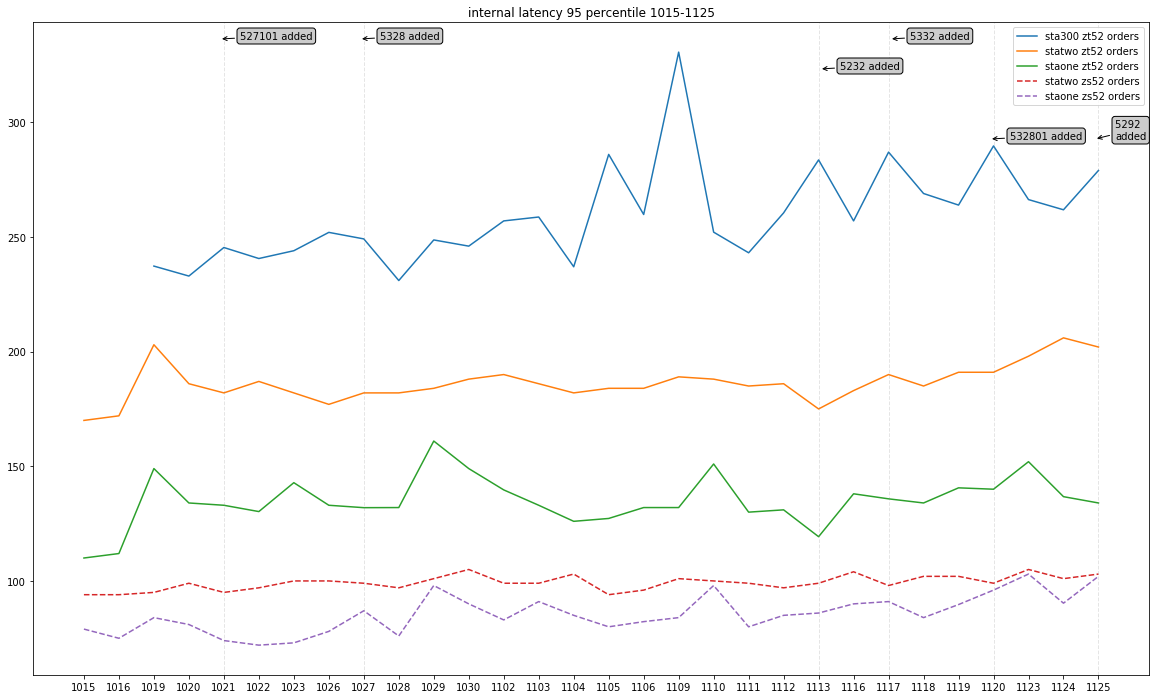

In [69]:
checkLog = orderLog[(orderLog["updateType"] == 0) & (orderLog['colo'].str[:5].isin(['zs_52', 'zt_52']))]
checkLog = checkLog[checkLog['caamd'] != 0]
checkLog['internal_latency'] = checkLog["clockAtArrival"] - checkLog["caamd"]
SZE = checkLog[(checkLog['secid'] >= 2000000) & (checkLog['colo'].str[:5] == 'zs_52')]
SSE = checkLog[(checkLog['secid'] < 2000000) & (checkLog['colo'].str[:5] == 'zt_52')]
SZE["exchange"] = "SZ"
SSE["exchange"] = "SH"
SZE = SZE[SZE["isMsg"] == 1]
re1 = SSE[(SSE["sta"] == '3. sta300')].groupby('date')['internal_latency'].quantile(.95).reset_index()
re2 = SSE[(SSE["sta"] == '2. statwo')].groupby('date')['internal_latency'].quantile(.95).reset_index()
re3 = SSE[(SSE['sta'] == '1. staone')].groupby('date')['internal_latency'].quantile(.95).reset_index()
re4 = SZE[(SZE["sta"] == '3. sta300')].groupby('date')['internal_latency'].quantile(.95).reset_index()
re5 = SZE[(SZE["sta"] == '2. statwo')].groupby('date')['internal_latency'].quantile(.95).reset_index()
re6 = SZE[(SZE['sta'] == '1. staone')].groupby('date')['internal_latency'].quantile(.95).reset_index()

fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111)
ax.plot([np.nan,np.nan] + list(re1['internal_latency'].values), label='sta300 zt52 orders')
ax.plot(re2['internal_latency'].values, label='statwo zt52 orders')
ax.plot(re3['internal_latency'].values, label='staone zt52 orders')
ax.plot(re5['internal_latency'].values, label='statwo zs52 orders', linestyle='dashed')
ax.plot(re6['internal_latency'].values, label='staone zs52 orders', linestyle='dashed')

ax.set_title('internal latency 95 percentile 1015-1125')
indexLs = [i for i in range(re3.shape[0])]
dateLs = [int(str(i)[4:8]) for i in re3['date'].values]
ax.set_xticks(indexLs)
ax.set_xticklabels(dateLs)
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
plt.axvline(x=4,ls="--",c="grey", alpha=0.2, lw=1)
plt.axvline(x=8,ls="--",c="grey", alpha=0.2, lw=1)
plt.axvline(x=21,ls="--",c="grey", alpha=0.2, lw=1)
plt.axvline(x=23,ls="--",c="grey", alpha=0.2, lw=1)
plt.axvline(x=26,ls="--",c="grey", alpha=0.2, lw=1)
plt.axvline(x=29,ls="--",c="grey", alpha=0.2, lw=1)
bbox = dict(boxstyle="round", fc="0.8")
arrowprops = dict(
    arrowstyle = "->")
ax.annotate('527101 added', (220, 660), xytext=(20, 0), xycoords='figure pixels', textcoords='offset points',
            bbox=bbox, arrowprops=arrowprops)
ax.annotate('5328 added', (360, 660), xytext=(20, 0), xycoords='figure pixels', textcoords='offset points',
            bbox=bbox, arrowprops=arrowprops)
ax.annotate('5232 added', (820, 630), xytext=(20, 0), xycoords='figure pixels', textcoords='offset points',
            bbox=bbox, arrowprops=arrowprops)
ax.annotate('5332 added', (890, 660), xytext=(20, 0), xycoords='figure pixels', textcoords='offset points',
            bbox=bbox, arrowprops=arrowprops)
ax.annotate('532801 added', (990, 560), xytext=(20, 0), xycoords='figure pixels', textcoords='offset points',
            bbox=bbox, arrowprops=arrowprops)
ax.annotate('5292 \nadded', (1095, 560), xytext=(20, 0), xycoords='figure pixels', textcoords='offset points',
            bbox=bbox, arrowprops=arrowprops)


plt.show()

/home/work516/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/work516/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


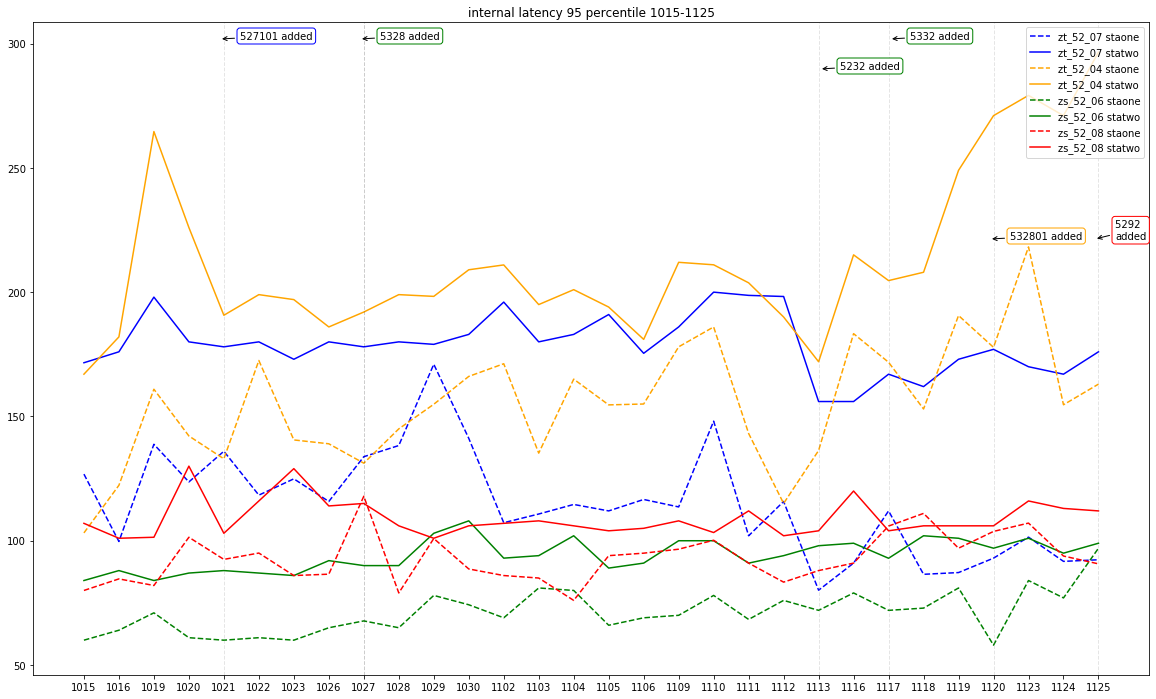

In [39]:
checkLog = orderLog[(orderLog["updateType"] == 0) & (orderLog['colo'].str[:5].isin(['zs_52', 'zt_52']))]
checkLog = checkLog[checkLog['caamd'] != 0]
checkLog['internal_latency'] = checkLog["clockAtArrival"] - checkLog["caamd"]
SZE = checkLog[(checkLog['secid'] >= 2000000) & (checkLog['colo'].str[:5] == 'zs_52')]
SSE = checkLog[(checkLog['secid'] < 2000000) & (checkLog['colo'].str[:5] == 'zt_52')]
SZE["exchange"] = "SZ"
SSE["exchange"] = "SH"
SZE = SZE[SZE["isMsg"] == 1]
# re1 = SSE[(SSE["colo"] == 'zt_52_07') & (SSE['sta'] == '1. staone')].groupby('date')['internal_latency'].quantile(.95).reset_index()
re2 = SSE[(SSE["colo"] == 'zt_52_07') & (SSE['sta'] == '2. statwo')].groupby('date')['internal_latency'].quantile(.95).reset_index()
# re3 = SSE[(SSE["colo"] == 'zt_52_04') & (SSE['sta'] == '1. staone')].groupby('date')['internal_latency'].quantile(.95).reset_index()
re4 = SSE[(SSE["colo"] == 'zt_52_04') & (SSE['sta'] == '2. statwo')].groupby('date')['internal_latency'].quantile(.95).reset_index()
# re5 = SZE[(SZE["colo"] == 'zs_52_06') & (SZE['sta'] == '1. staone')].groupby('date')['internal_latency'].quantile(.95).reset_index()
re6 = SZE[(SZE["colo"] == 'zs_52_06') & (SZE['sta'] == '2. statwo')].groupby('date')['internal_latency'].quantile(.95).reset_index()
# re7 = SZE[(SZE["colo"] == 'zs_52_08') & (SZE['sta'] == '1. staone')].groupby('date')['internal_latency'].quantile(.95).reset_index()
re8 = SZE[(SZE["colo"] == 'zs_52_08') & (SZE['sta'] == '2. statwo')].groupby('date')['internal_latency'].quantile(.95).reset_index()

fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111)
# ax.plot(re1['internal_latency'].values, label='zt_52_07 staone', color='blue', ls='--')
ax.plot(re2['internal_latency'].values, label='zt_52_07 statwo', color='blue')
# ax.plot(re3['internal_latency'].values, label='zt_52_04 staone', color='orange', ls='--')
ax.plot(re4['internal_latency'].values, label='zt_52_04 statwo', color='orange')
# ax.plot(re5['internal_latency'].values, label='zs_52_06 staone', color='green', ls='--')
ax.plot(re6['internal_latency'].values, label='zs_52_06 statwo', color='green')
# ax.plot(re7['internal_latency'].values, label='zs_52_08 staone', color='red', ls='--')
ax.plot(re8['internal_latency'].values, label='zs_52_08 statwo', color='red')

ax.set_title('statwo internal latency 95 percentile 1015-1125')
indexLs = [i for i in range(re3.shape[0])]
dateLs = [int(str(i)[4:8]) for i in re3['date'].values]
ax.set_xticks(indexLs)
ax.set_xticklabels(dateLs)
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
plt.axvline(x=4,ls="--",c="grey", alpha=0.2, lw=1)
plt.axvline(x=8,ls="--",c="black", alpha=0.2, lw=1)
plt.axvline(x=21,ls="--",c="grey", alpha=0.2, lw=1)
plt.axvline(x=23,ls="--",c="grey", alpha=0.2, lw=1)
plt.axvline(x=26,ls="--",c="grey", alpha=0.2, lw=1)
plt.axvline(x=29,ls="--",c="grey", alpha=0.2, lw=1)
bbox1 = dict(boxstyle="round", edgecolor="red", fc='white')
bbox2 = dict(boxstyle="round", edgecolor="green", fc='white')
bbox3 = dict(boxstyle="round", edgecolor="orange", fc='white')
bbox4 = dict(boxstyle="round", edgecolor="blue", fc='white')
arrowprops = dict(
    arrowstyle = "->")

ax.annotate('527101 added', (220, 660), xytext=(20, 0), xycoords='figure pixels', textcoords='offset points',
            bbox=bbox4, arrowprops=arrowprops)
ax.annotate('5328 added', (360, 660), xytext=(20, 0), xycoords='figure pixels', textcoords='offset points',
            bbox=bbox2, arrowprops=arrowprops)
ax.annotate('5232 added', (820, 630), xytext=(20, 0), xycoords='figure pixels', textcoords='offset points',
            bbox=bbox2, arrowprops=arrowprops)
ax.annotate('5332 added', (890, 660), xytext=(20, 0), xycoords='figure pixels', textcoords='offset points',
            bbox=bbox2, arrowprops=arrowprops)
ax.annotate('532801 added', (990, 460), xytext=(20, 0), xycoords='figure pixels', textcoords='offset points',
            bbox=bbox3, arrowprops=arrowprops)
ax.annotate('5292 \nadded', (1095, 460), xytext=(20, 0), xycoords='figure pixels', textcoords='offset points',
            bbox=bbox1, arrowprops=arrowprops)


plt.show()

/home/work516/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/work516/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


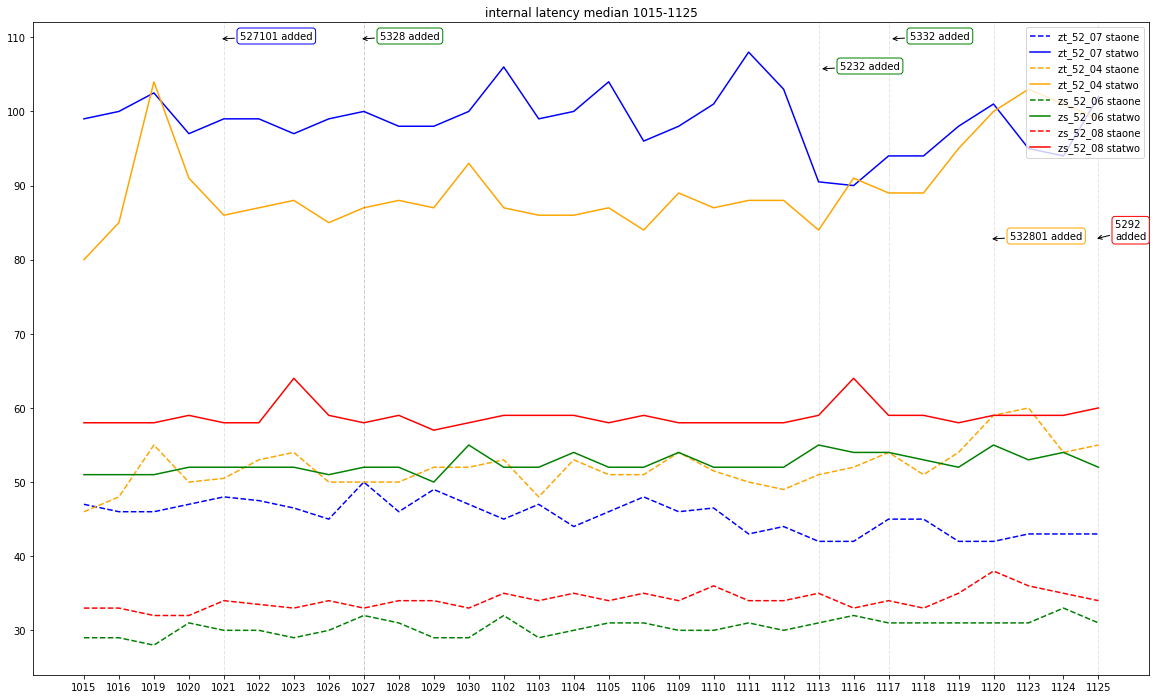

In [40]:
checkLog = orderLog[(orderLog["updateType"] == 0) & (orderLog['colo'].str[:5].isin(['zs_52', 'zt_52']))]
checkLog = checkLog[checkLog['caamd'] != 0]
checkLog['internal_latency'] = checkLog["clockAtArrival"] - checkLog["caamd"]
SZE = checkLog[(checkLog['secid'] >= 2000000) & (checkLog['colo'].str[:5] == 'zs_52')]
SSE = checkLog[(checkLog['secid'] < 2000000) & (checkLog['colo'].str[:5] == 'zt_52')]
SZE["exchange"] = "SZ"
SSE["exchange"] = "SH"
SZE = SZE[SZE["isMsg"] == 1]
# re1 = SSE[(SSE["colo"] == 'zt_52_07') & (SSE['sta'] == '1. staone')].groupby('date')['internal_latency'].median().reset_index()
re2 = SSE[(SSE["colo"] == 'zt_52_07') & (SSE['sta'] == '2. statwo')].groupby('date')['internal_latency'].median().reset_index()
# re3 = SSE[(SSE["colo"] == 'zt_52_04') & (SSE['sta'] == '1. staone')].groupby('date')['internal_latency'].median().reset_index()
re4 = SSE[(SSE["colo"] == 'zt_52_04') & (SSE['sta'] == '2. statwo')].groupby('date')['internal_latency'].median().reset_index()
# re5 = SZE[(SZE["colo"] == 'zs_52_06') & (SZE['sta'] == '1. staone')].groupby('date')['internal_latency'].median().reset_index()
re6 = SZE[(SZE["colo"] == 'zs_52_06') & (SZE['sta'] == '2. statwo')].groupby('date')['internal_latency'].median().reset_index()
# re7 = SZE[(SZE["colo"] == 'zs_52_08') & (SZE['sta'] == '1. staone')].groupby('date')['internal_latency'].median().reset_index()
re8 = SZE[(SZE["colo"] == 'zs_52_08') & (SZE['sta'] == '2. statwo')].groupby('date')['internal_latency'].median().reset_index()

fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111)
# ax.plot(re1['internal_latency'].values, label='zt_52_07 staone', color='blue', ls='--')
ax.plot(re2['internal_latency'].values, label='zt_52_07 statwo', color='blue')
# ax.plot(re3['internal_latency'].values, label='zt_52_04 staone', color='orange', ls='--')
ax.plot(re4['internal_latency'].values, label='zt_52_04 statwo', color='orange')
# ax.plot(re5['internal_latency'].values, label='zs_52_06 staone', color='green', ls='--')
ax.plot(re6['internal_latency'].values, label='zs_52_06 statwo', color='green')
# ax.plot(re7['internal_latency'].values, label='zs_52_08 staone', color='red', ls='--')
ax.plot(re8['internal_latency'].values, label='zs_52_08 statwo', color='red')

ax.set_title('statwo internal latency median 1015-1125')
indexLs = [i for i in range(re3.shape[0])]
dateLs = [int(str(i)[4:8]) for i in re3['date'].values]
ax.set_xticks(indexLs)
ax.set_xticklabels(dateLs)
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
plt.axvline(x=4,ls="--",c="grey", alpha=0.2, lw=1)
plt.axvline(x=8,ls="--",c="black", alpha=0.2, lw=1)
plt.axvline(x=21,ls="--",c="grey", alpha=0.2, lw=1)
plt.axvline(x=23,ls="--",c="grey", alpha=0.2, lw=1)
plt.axvline(x=26,ls="--",c="grey", alpha=0.2, lw=1)
plt.axvline(x=29,ls="--",c="grey", alpha=0.2, lw=1)
bbox1 = dict(boxstyle="round", edgecolor="red", fc='white')
bbox2 = dict(boxstyle="round", edgecolor="green", fc='white')
bbox3 = dict(boxstyle="round", edgecolor="orange", fc='white')
bbox4 = dict(boxstyle="round", edgecolor="blue", fc='white')
arrowprops = dict(
    arrowstyle = "->")

ax.annotate('527101 added', (220, 660), xytext=(20, 0), xycoords='figure pixels', textcoords='offset points',
            bbox=bbox4, arrowprops=arrowprops)
ax.annotate('5328 added', (360, 660), xytext=(20, 0), xycoords='figure pixels', textcoords='offset points',
            bbox=bbox2, arrowprops=arrowprops)
ax.annotate('5232 added', (820, 630), xytext=(20, 0), xycoords='figure pixels', textcoords='offset points',
            bbox=bbox2, arrowprops=arrowprops)
ax.annotate('5332 added', (890, 660), xytext=(20, 0), xycoords='figure pixels', textcoords='offset points',
            bbox=bbox2, arrowprops=arrowprops)
ax.annotate('532801 added', (990, 460), xytext=(20, 0), xycoords='figure pixels', textcoords='offset points',
            bbox=bbox3, arrowprops=arrowprops)
ax.annotate('5292 \nadded', (1095, 460), xytext=(20, 0), xycoords='figure pixels', textcoords='offset points',
            bbox=bbox1, arrowprops=arrowprops)


plt.show()

/home/work516/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/work516/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


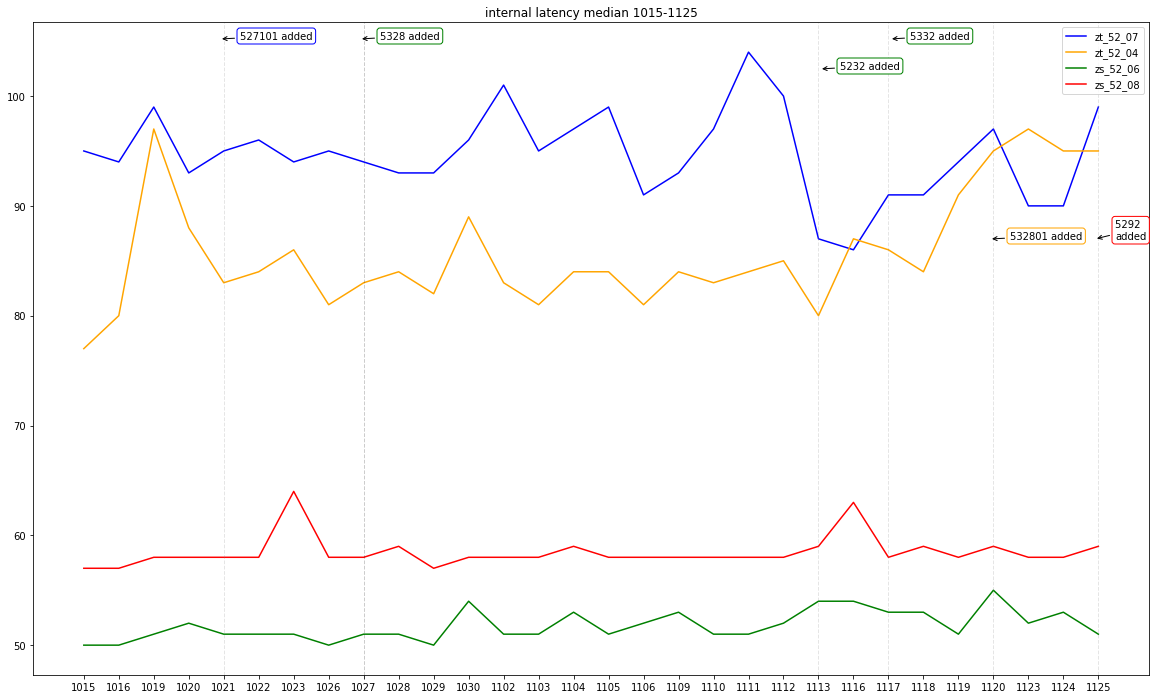

In [41]:
checkLog = orderLog[(orderLog["updateType"] == 0) & (orderLog['colo'].str[:5].isin(['zs_52', 'zt_52']))]
checkLog = checkLog[checkLog['caamd'] != 0]
checkLog['internal_latency'] = checkLog["clockAtArrival"] - checkLog["caamd"]
SZE = checkLog[(checkLog['secid'] >= 2000000) & (checkLog['colo'].str[:5] == 'zs_52')]
SSE = checkLog[(checkLog['secid'] < 2000000) & (checkLog['colo'].str[:5] == 'zt_52')]
SZE["exchange"] = "SZ"
SSE["exchange"] = "SH"
SZE = SZE[SZE["isMsg"] == 1]
re1 = SSE[(SSE["colo"] == 'zt_52_07')].groupby('date')['internal_latency'].median().reset_index()
re2 = SSE[(SSE["colo"] == 'zt_52_04')].groupby('date')['internal_latency'].median().reset_index()
re3 = SZE[(SZE["colo"] == 'zs_52_06')].groupby('date')['internal_latency'].median().reset_index()
re4 = SZE[(SZE["colo"] == 'zs_52_08')].groupby('date')['internal_latency'].median().reset_index()

fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111)
ax.plot(re1['internal_latency'].values, label='zt_52_07', color='blue')
ax.plot(re2['internal_latency'].values, label='zt_52_04', color='orange')
ax.plot(re3['internal_latency'].values, label='zs_52_06', color='green')
ax.plot(re4['internal_latency'].values, label='zs_52_08', color='red')

ax.set_title('internal latency median 1015-1125')
indexLs = [i for i in range(re3.shape[0])]
dateLs = [int(str(i)[4:8]) for i in re3['date'].values]
ax.set_xticks(indexLs)
ax.set_xticklabels(dateLs)
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
plt.axvline(x=4,ls="--",c="grey", alpha=0.2, lw=1)
plt.axvline(x=8,ls="--",c="black", alpha=0.2, lw=1)
plt.axvline(x=21,ls="--",c="grey", alpha=0.2, lw=1)
plt.axvline(x=23,ls="--",c="grey", alpha=0.2, lw=1)
plt.axvline(x=26,ls="--",c="grey", alpha=0.2, lw=1)
plt.axvline(x=29,ls="--",c="grey", alpha=0.2, lw=1)
bbox1 = dict(boxstyle="round", edgecolor="red", fc='white')
bbox2 = dict(boxstyle="round", edgecolor="green", fc='white')
bbox3 = dict(boxstyle="round", edgecolor="orange", fc='white')
bbox4 = dict(boxstyle="round", edgecolor="blue", fc='white')
arrowprops = dict(
    arrowstyle = "->")

ax.annotate('527101 added', (220, 660), xytext=(20, 0), xycoords='figure pixels', textcoords='offset points',
            bbox=bbox4, arrowprops=arrowprops)
ax.annotate('5328 added', (360, 660), xytext=(20, 0), xycoords='figure pixels', textcoords='offset points',
            bbox=bbox2, arrowprops=arrowprops)
ax.annotate('5232 added', (820, 630), xytext=(20, 0), xycoords='figure pixels', textcoords='offset points',
            bbox=bbox2, arrowprops=arrowprops)
ax.annotate('5332 added', (890, 660), xytext=(20, 0), xycoords='figure pixels', textcoords='offset points',
            bbox=bbox2, arrowprops=arrowprops)
ax.annotate('532801 added', (990, 460), xytext=(20, 0), xycoords='figure pixels', textcoords='offset points',
            bbox=bbox3, arrowprops=arrowprops)
ax.annotate('5292 \nadded', (1095, 460), xytext=(20, 0), xycoords='figure pixels', textcoords='offset points',
            bbox=bbox1, arrowprops=arrowprops)


plt.show()

In [45]:
re4['internal_latency'].values

array([57, 57, 58, 58, 58, 58, 64, 58, 58, 59, 57, 58, 58, 58, 59, 58, 58,
       58, 58, 58, 58, 59, 63, 58, 59, 58, 59, 58, 58, 59], dtype=int64)

In [32]:
display(orderLog[(orderLog['accCode'] == 527101) & (orderLog['exchange'] == 'SSE')].groupby(['accCode', 'date', 'sta'])['order'].nunique())
display(orderLog[(orderLog['accCode'] == 5328) & (orderLog['exchange'] == 'SZE')].groupby(['accCode', 'date', 'sta'])['order'].nunique())
display(orderLog[(orderLog['accCode'] == 5232) & (orderLog['exchange'] == 'SZE')].groupby(['accCode', 'date', 'sta'])['order'].nunique())
display(orderLog[(orderLog['accCode'] == 5332) & (orderLog['exchange'] == 'SZE')].groupby(['accCode', 'date', 'sta'])['order'].nunique())
display(orderLog[(orderLog['accCode'] == 532801) & (orderLog['exchange'] == 'SSE')].groupby(['accCode', 'date', 'sta'])['order'].nunique())
display(orderLog[(orderLog['accCode'] == 5292) & (orderLog['exchange'] == 'SZE')].groupby(['accCode', 'date', 'sta'])['order'].nunique())

accCode  date      sta      
527101   20201021  1. staone      37
                   2. statwo     937
         20201022  1. staone      28
                   2. statwo     770
         20201023  1. staone      38
                   2. statwo    1191
         20201026  1. staone      85
                   2. statwo    1443
         20201027  1. staone      12
                   2. statwo     935
         20201028  1. staone      35
                   2. statwo     896
         20201029  1. staone      51
                   2. statwo     923
         20201030  1. staone      86
                   2. statwo    1531
         20201102  1. staone      70
                   2. statwo    1187
         20201103  1. staone      27
                   2. statwo    1207
         20201104  1. staone      31
                   2. statwo     833
         20201105  1. staone      38
                   2. statwo     803
         20201106  1. staone      23
                   2. statwo     615
         

accCode  date      sta      
5328     20201027  1. staone      9
                   2. statwo    202
         20201028  1. staone     78
                   2. statwo    512
         20201029  1. staone    194
                   2. statwo    499
         20201030  1. staone     89
                   2. statwo    546
         20201102  1. staone    111
                   2. statwo    655
         20201103  1. staone     92
                   2. statwo     68
         20201104  1. staone     46
                   2. statwo    689
         20201105  1. staone    161
                   2. statwo     87
         20201106  1. staone     81
                   2. statwo    550
         20201109  1. staone    158
                   2. statwo    580
         20201110  1. staone    101
                   2. statwo    454
         20201111  1. staone    197
                   2. statwo    654
         20201112  1. staone    147
                   2. statwo    766
         20201113  1. staone    134

accCode  date      sta      
5232     20201113  1. staone     265
                   2. statwo     900
         20201116  1. staone     149
                   2. statwo     961
         20201124  1. staone      40
                   2. statwo     823
         20201125  1. staone     142
                   2. statwo    2486
Name: order, dtype: int64

accCode  date      sta      
5332     20201117  1. staone     241
                   2. statwo    1409
         20201118  1. staone     339
                   2. statwo    1644
         20201119  1. staone     309
                   2. statwo     844
         20201120  1. staone     171
                   2. statwo     619
         20201123  1. staone     356
                   2. statwo    1305
         20201124  1. staone     346
                   2. statwo     936
         20201125  1. staone     328
                   2. statwo    1459
Name: order, dtype: int64

accCode  date      sta      
532801   20201120  1. staone     29
                   2. statwo    158
         20201123  1. staone     42
                   2. statwo    324
         20201124  1. staone      2
                   2. statwo    454
         20201125  1. staone     11
                   2. statwo    102
Name: order, dtype: int64

accCode  date      sta      
5292     20201125  1. staone     12
                   2. statwo    222
Name: order, dtype: int64